1. Create data and implement PCA algorithm then visualize each step like the below figure.

2. Implement PCA algorithm to reduce dimension (2D) of iris dataset (https://archive.ics.uci.edu/ml/datasets/iris), then visualize  the result.

3. Use PCA in sklearn to iris dataset and compare the result with the question 2.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

**Ex1:**

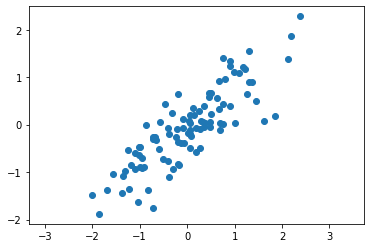

In [2]:
#Create random data
r = np.random.RandomState(42)
X = np.dot(r.rand(2,2), r.randn(2, 100)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

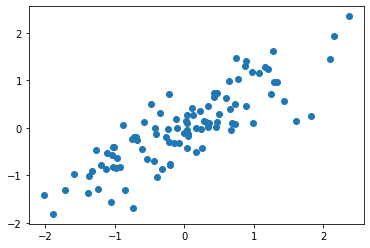

In [3]:
#Subtract mean from data
mean = np.mean(X, axis= 0)
X_meaned = X - mean
plt.scatter(X_meaned[:, 0], X_meaned[:, 1])
plt.show()

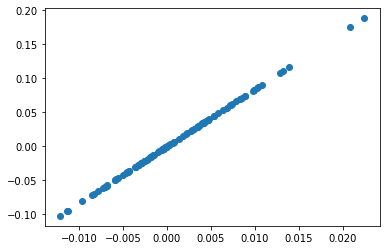

In [4]:
#Compute covariance matrix
cov = np.cov(X_meaned.T)
X = np.cov(X)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [5]:
#Perform eigen decomposition of covariance matrix
eigen_values , eigen_vectors = np.linalg.eig(cov)
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [6]:
#Select N components
n_components = 1
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [7]:
#Take transpose of eigen vectors with data
pca_data = np.dot( X_meaned, eigenvector_subset)

**Ex2:** 

In [8]:
iris = pd.read_csv("iris.data", names=['sepal length','sepal width','petal length','petal width','target'])
iris.head(3)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [9]:
iris.shape

(150, 5)

In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
def pca(X , dim):
    #Calculate mean and centering by sub-tracting the mean from each data point
    X_meaned = X - np.mean(X, axis = 0)
    #Calculate cov matrix
    cov_mat = np.cov(X_meaned, rowvar = False)
    #Calculate eigenvalues and eigenvector 
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    #Sort eigenvalues and eigenvector in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    #Select dim
    eigenvector_subset = sorted_eigenvectors[:,0:dim]
    #Transform data
    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose() ).transpose()
    return X_reduced

In [12]:
x = iris.iloc[:,0:4]
target = iris.iloc[:,4]

iris_pca = pca(x , 2)
 
df = pd.DataFrame(iris_pca , columns = ['PC1','PC2'])
df = pd.concat([df , pd.DataFrame(target)] , axis = 1)

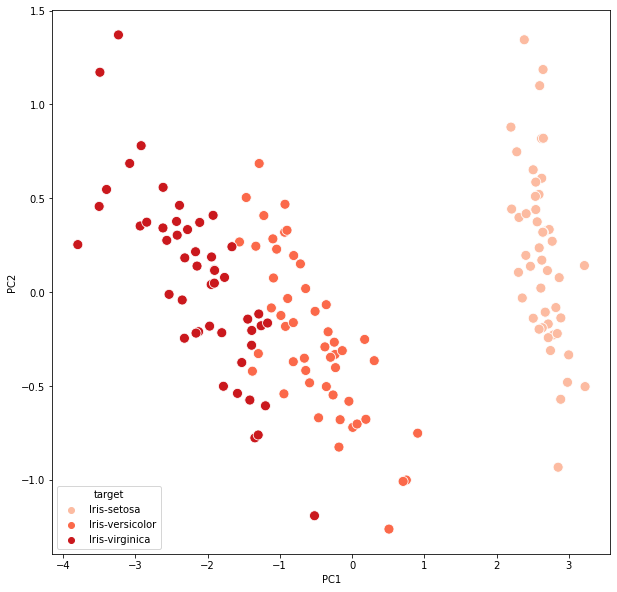

In [13]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = df , x = 'PC1',y = 'PC2', s= 100, hue= 'target', palette= 'Reds')

**Ex3:**

In [14]:
from sklearn.decomposition import PCA
pca_ex3 = PCA(n_components=2)
ex3 = pca_ex3.fit_transform(x)

In [15]:
df1 = pd.DataFrame(ex3 , columns = ['PC1','PC2'])
df1 = pd.concat([df1 , pd.DataFrame(target)] , axis = 1)

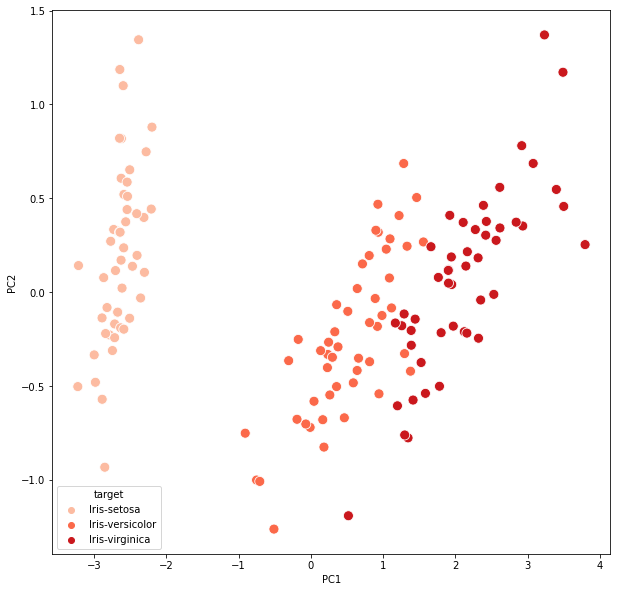

In [16]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = df1 , x = 'PC1',y = 'PC2', s= 100, hue= 'target', palette= 'Reds')